<a href="https://colab.research.google.com/github/quadribello/Hamoye/blob/master/Wrangling_Time_Series_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(0, 0.5, 'Passengers')

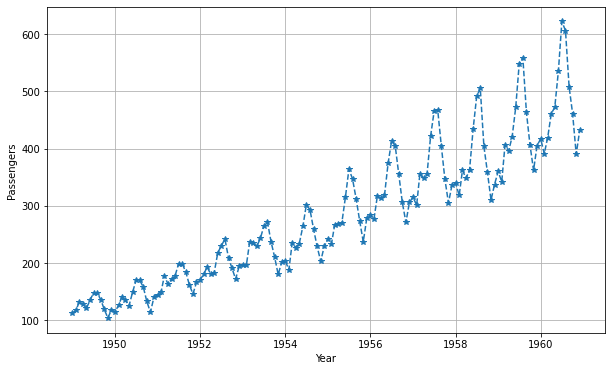

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv( "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv" )
df[ "Month" ] = pd.to_datetime(df[ "Month" ]) #convert column to datetime
df.set_index( "Month" , inplace= True )
plt.figure(figsize=( 10 , 6 ))
plt.plot(df.index, df.Passengers, '--' , marker= '*' , )
plt.grid()
plt.xlabel( 'Year' )
plt.ylabel( 'Passengers' ) 

In [2]:
# check for missing values
df.isnull().values.any()

False

In [3]:
#missing values, we will make a copy of our dataset and delete some values at random.
df_copy = df.copy()
rows = df_copy.sample(frac=0.1, random_state=0)
rows['Passengers'] = np.nan
df_copy.loc[rows.index, 'Passengers'] = rows['Passengers']
df_copy.isnull().sum()
#There are now 14 missing values in the dataset

Passengers    14
dtype: int64

In [4]:
# Filling missing data by imputation - Forward fill
df_copy_ffill = df_copy.fillna(method='ffill')
df_copy_ffill.isnull().sum()

Passengers    0
dtype: int64

In [5]:
# Filling missing data by imputation - Backward fill
df_copy_bfill = df_copy.fillna(method='bfill')
df_copy_bfill.isnull().sum()

Passengers    0
dtype: int64

In [6]:
# Filling missing data by interpolation
df_copy_LIF = df_copy.interpolate(method='linear', limit_direction='forward')
df_copy_LIF.isnull().sum()

Passengers    0
dtype: int64

In [7]:
df_copy_LIB = df_copy.interpolate(method='linear',limit_direction='backward')
df_copy_LIB.isnull().sum()

Passengers    0
dtype: int64

## Downsampling and Upsampling

In [8]:
#Downsample to quarterly data points
df_quarterly = df.resample('3M').mean()

Text(0.5, 1.0, 'Downsampled Data')

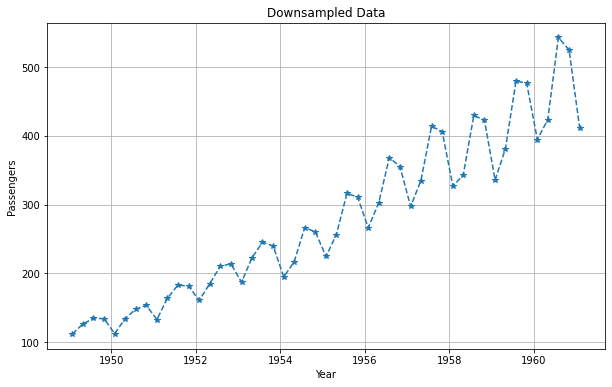

In [9]:
plt.figure(figsize=(10,6))
plt.plot(df_quarterly.index, df_quarterly.Passengers, '--', marker='*',)
plt.grid()
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.title('Downsampled Data')

Text(0.5, 1.0, 'Upsampled Data')

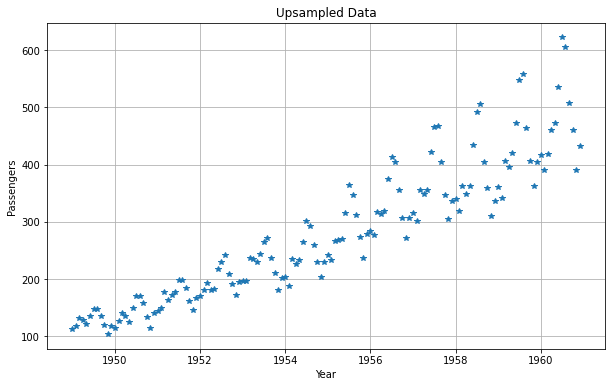

In [10]:
#Upsample to daily data points
df_daily = df.resample('D').mean()
plt.figure(figsize=(10,6))
plt.plot(df_daily.index, df_daily.Passengers, '--', marker='*',)
plt.grid()
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.title('Upsampled Data')

In [11]:
df_MA = df.copy()
MA = df_MA['Passengers'].rolling(12).mean()

Text(0.5, 1.0, 'Upsampled Data')

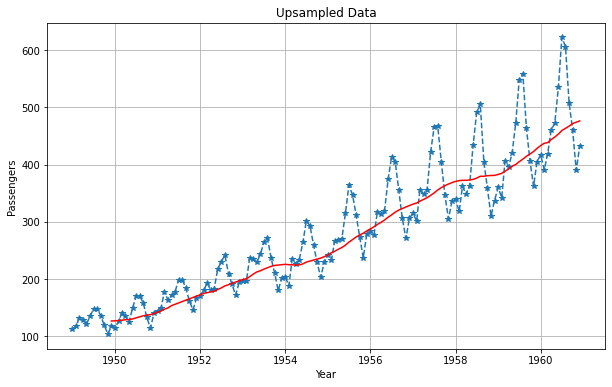

In [12]:
plt.figure(figsize=(10,6))
plt.plot(df_MA.index, df_MA.Passengers, '--', marker='*',)
plt.plot(df_MA.rolling( 12 ).mean(), color= 'red' )
plt.grid()
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.title('Upsampled Data')

## Time Series Specific Exploratory Methods

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


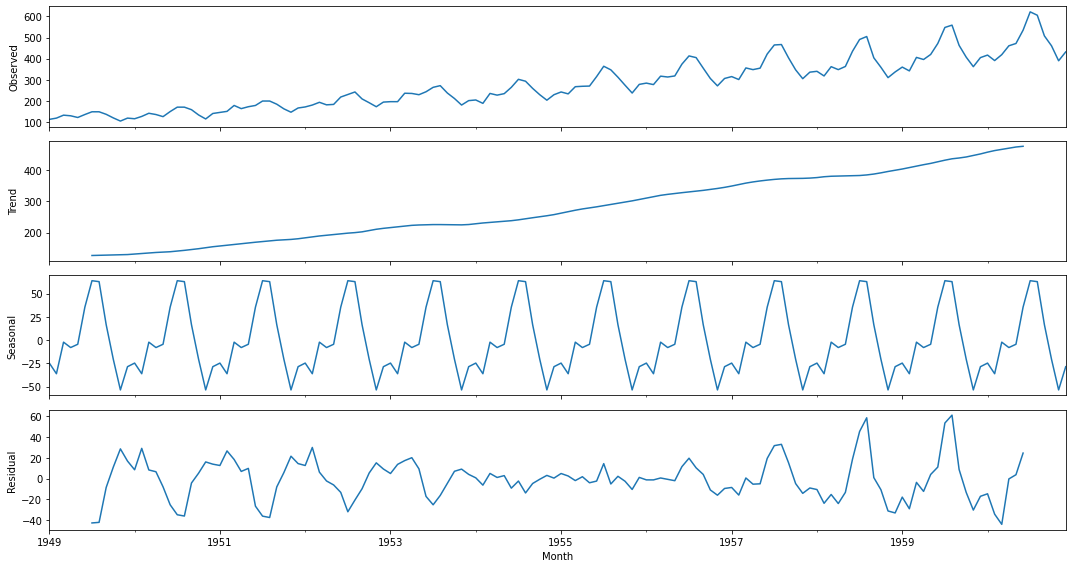

In [13]:
import statsmodels.api as sm 
from pylab  import rcParams
rcParams['figure.figsize'] = 15,8
decompose_series = sm.tsa.seasonal_decompose(df['Passengers'], model='addictive')
decompose_series.plot()
plt.show()

In [14]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df[ 'Passengers' ])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print(f'No. of lags used: {result[ 2 ]} ' )
print(f'No. of observations used : {result[ 3 ]}') 
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
No. of lags used: 13 
No. of observations used : 130
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


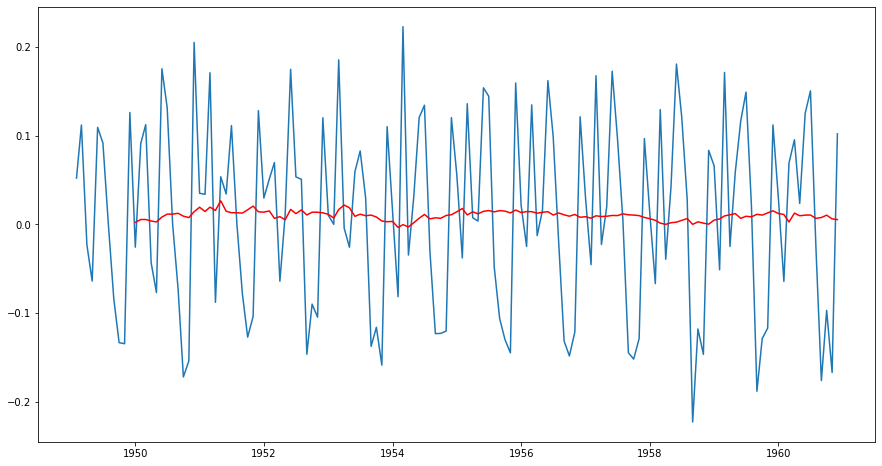

In [16]:
#Convert time series to stationary by removing trend and seasonality
#Transformation and Differencing
df_log = np.log(df)
df_diff = df_log.diff(periods= 1 )
plt.plot(df_diff.index, df_diff.Passengers, '-' )
plt.plot(df_diff.rolling( 12 ).mean(), color= 'red' )